# 노이즈 유형 (1) 문장부호 : Hi, my name is john
- 문장 부호 양쪽에 공백을 추가하는 방법을 취하자.



In [1]:
def pad_punctuation(sentence, punc):
  for p in punc:
    sentence = sentence.replace(p, " " + p + " ")
  return sentence

sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


# 노이즈 유형 (2) 대소문자 : First, open the first chapter
- 모든 단어를 소문자로 바꾸는 방법

In [2]:
sentence = "First, open the first chapter."
print(sentence.lower())

first, open the first chapter.


In [3]:
sentence = "First, open the first chapter."
print(sentence.upper())

FIRST, OPEN THE FIRST CHAPTER.


# 노이즈 유형 (3) 특수문자 : He is a ten year old boy
- 사용할 알파벳과 기호들을 정의해 이를 제외하고 모두 제거하자.

In [4]:
import re

sentence = "He is a ten-year old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)
print(sentence)

He is a ten year old boy.


# 배운 것들을 종합하기

- https://www.gutenberg.org/files/2397/2397-h/2397-h.htm

- def cleaning_text (text, punc, regex):  
&nbsp;&nbsp;&nbsp;&nbsp;코드  
  return  
print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))

- 노이즈 유형 1, 2, 3 다 사용해서, 정제하기

In [5]:
import re

corpus = \
'''
Did I tell you in my last letter that I had a new dress,
a real party dress with low neck and short sleeves and quite a train?
It is pale blue, trimmed with chiffon of the same color.
I have worn it only once, but then I felt that Solomon in all his glory was not to be compared with me!
Anyway, he certainly never had a dress like mine!...
'''

def cleaning_text(text, punc, regex):
  # 노이즈 유형 (1) 문장 부호 공백 추가
  for p in punc:
    text = text.replace(p, " " + p + " ")
  # 노이즈 유형 (2), (3), 소문자화 및 특수 문자 제거
  text = re.sub(regex, " ", text).lower()
  
  return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


did i tell you in my last letter that i had a new dress , 
a real party dress with low neck and short sleeves and quite a train ? 
it is pale blue ,  trimmed with chiffon of the same color . 
i have worn it only once ,  but then i felt that solomon in all his glory was not to be compared with me ! 
anyway ,  he certainly never had a dress like mine !  .  .  . 



# Tokenization
## mecab 설치
- Colab에서 Mecab-ko-dic를 쉽게 설치할 수 있도록 도와주는 Shell-Script
- 링크 참조 : https://github.com/SOMJANG/Mecab-ko-for-Google-Colab
- Mecab은 Colab에서 공식적으로 지원해 주지 않기 때문에 이러한 방법을 쓴다.

In [6]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [7]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [8]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [9]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [10]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 14.1MB/s 
     |████████████████████████████████| 450kB 42.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-09 07:11:59--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=9IMFGRteOilyWLY9imyVR3AfWbo%3D&Expires=1623224067&AWSAccessKeyId=AKIA6KOSE3BNJ

## koLNPy 설치

In [11]:
!pip install konlpy

## 토큰화 예제

In [12]:
from konlpy.tag import Mecab

In [13]:
mecab = Mecab()

In [14]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


## 실습

In [15]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [19]:
path_to_file = '/content/korean-english-park.train.ko'  # 드라이브에 마운트

In [20]:
with open(path_to_file, "r", encoding = 'utf-8') as f:
  raw = f.read().splitlines()

print("Data Size", len(raw))
print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  60


Text(0.5, 1.0, 'Sentence Length Distribution')

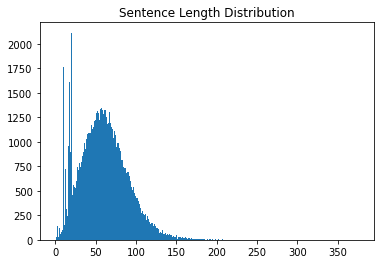

In [21]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이 : ", min_len)
print("문장의 최장 길이 : ", max_len)
print("문장의 평균 길이 : ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype = np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title("Sentence Length Distribution")

In [22]:
def check_sentence_with_length(raw, length):
  count = 0
  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return
  
  check_sentence_with_length(raw, 4)

In [23]:
for idx, _sum in enumerate(sentence_length):
  # 문장의 수가 1,500을 초과하는 문장 길이를 추출합니다.
  if _sum > 1500:
    print("Outlier index:", idx+1)

Outlier index: 11
Outlier index: 19
Outlier index: 21


In [24]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [25]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이 : ", min_len)
print("문장의 최장 길이 : ", max_len)
print("문장의 평균 길이 : ", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype = np.int)

Data Size: 77591
문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  64


In [ ]:
check_sentence_with_length(cleaned_corpus, 11)

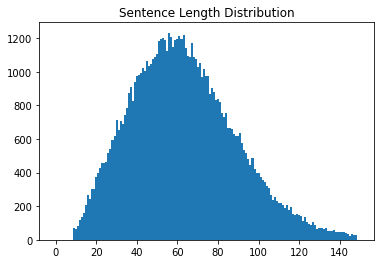

In [27]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

sentence_length = np.zeros((max_len), dtype = np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 공백 기반 토큰화

In [35]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
  return tensor, tokenizer

In [36]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요
split_corpus = []

for kor in filtered_corpus:
  # 코드 작성
  split_corpus.append(kor.split())

In [37]:
split_tensor, split_tokenizer = tokenize(split_corpus)
print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [38]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ":", word)

  if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [40]:
# 밝 + 혔다 / 밝 + 히다, 밝 + 다

# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어 보세요
# Hint :  mecab.morphs()를 사용해서 형태소 분석을 합니다.

def mecab_split(sentence):
  # 코드 작성
  return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
  # 코드 작성
  mecab_corpus.append(mecab_split(kor))

- 공백 기반으로는 237435개 토큰화된 거고 Mecab으로 형태소 기반은  52279개로 토큰화된 것


In [42]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


### 1) tokenizer.sequences_to_texts() 함수를 사용하여 Decoding

### 2) tokenizer.index_word를 사용하여 Decoding

#### 두 가지 방법으로 mecab_tensor[100]을 원문으로 되돌려 봅시다! (여기서는 띄어쓰기는 고려하지 않습니다!)

In [43]:
# case1 : tokenizer.sequences_to_texts()

# case1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])  # 100번째 문장
print(texts[0])

리차드 로버츠 전 총장 은 사 적 인 음란 행위 에 학교 돈 을 사용 했 다는 진술 이 있 은 후 퇴임 했 습니다 .


In [44]:
# Case2 : tokenizer.index_word

sentence = " "

# 코드 작성
for w in mecab_tensor[100]:
  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

 리차드 로버츠 전 총장 은 사 적 인 음란 행위 에 학교 돈 을 사용 했 다는 진술 이 있 은 후 퇴임 했 습니다 . 
